
# <center><font color='red'>Chicago Crimes</font></center>

## <left><font color='red'>Trend Analysis and Location Analysis</font></center>

In [7]:
#Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [8]:
#Insert data
df = pd.read_csv('Chicago-Crimes-2001_to_Present.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


<AxesSubplot:>

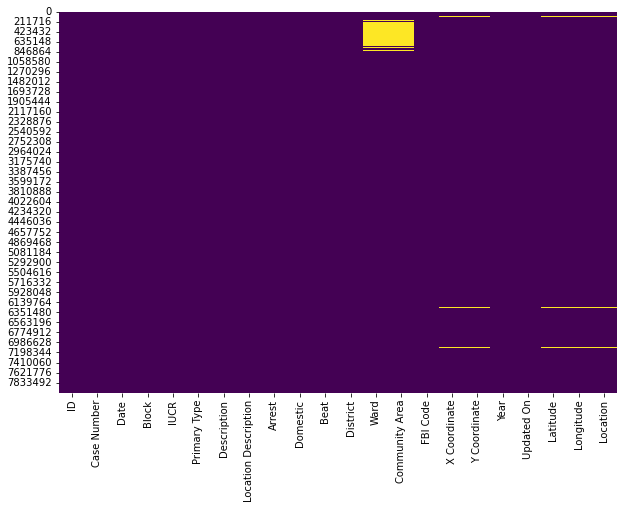

In [9]:
#Preprocessing
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

# A little self explanatory data exploration from our side.
Mostly focussing on the top 10 value counts available to us in terms of Location Description and the Primary Type of Crime

In [10]:
pd.value_counts(df['Location Description'])[:10]

STREET                            2101706
RESIDENCE                         1337298
APARTMENT                          928412
SIDEWALK                           742160
OTHER                              270005
PARKING LOT/GARAGE(NON.RESID.)     202963
ALLEY                              178940
SMALL RETAIL STORE                 154964
SCHOOL, PUBLIC, BUILDING           146373
RESIDENCE-GARAGE                   135523
Name: Location Description, dtype: int64

In [11]:
pd.value_counts(df['Primary Type'])[:10]

THEFT                  1699543
BATTERY                1467382
CRIMINAL DAMAGE         916770
NARCOTICS               753249
ASSAULT                 529951
OTHER OFFENSE           499728
BURGLARY                431664
MOTOR VEHICLE THEFT     402141
DECEPTIVE PRACTICE      362733
ROBBERY                 303283
Name: Primary Type, dtype: int64

# Location Description and it's semantics

<AxesSubplot:xlabel='count', ylabel='Location Description'>

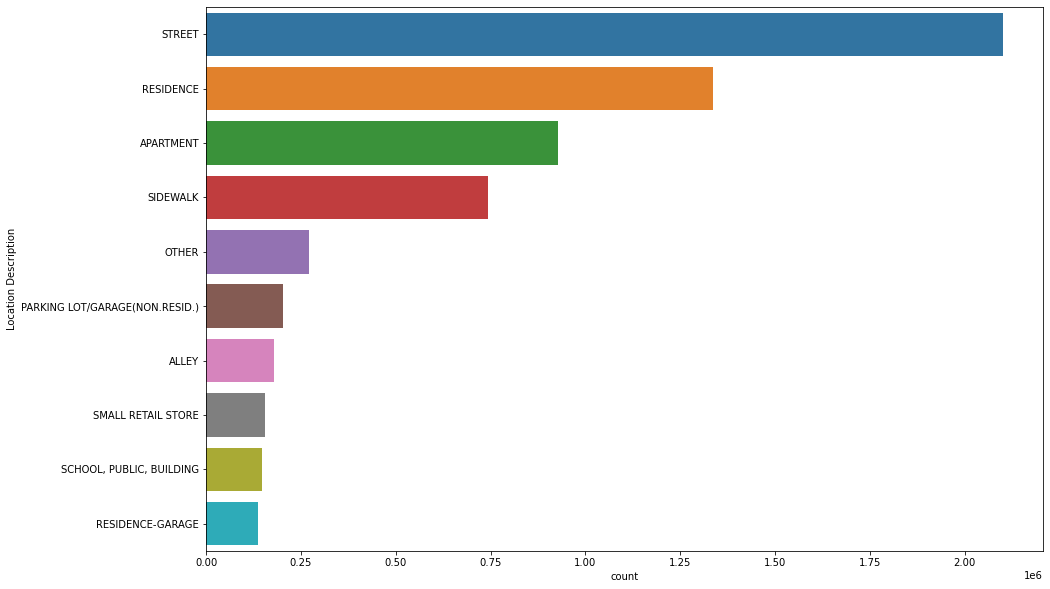

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

In [13]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [14]:
locations = df.groupby('Community Area').first()

In [15]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [16]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.881537,-87.616595,STREET,False
1.0,42.013788,-87.673183,OTHER,False
2.0,41.995367,-87.684902,STREET,False
3.0,41.973339,-87.653132,APARTMENT,False
4.0,41.973922,-87.679343,APARTMENT,False


In [17]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

# Preparing the first map.

### Using one location each in a particular community area

In [18]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [19]:
chicago_map

In [20]:
unique_locations = df['Location'].value_counts()

In [21]:
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.897895128, -87.624096605)',
       '(41.909664252, -87.742728815)', '(41.788987036, -87.74147999)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868180939, -87.709271389)', '(41.979006297, -87.906463155)',
       ...
       '(41.869824489, -87.642132986)', '(41.763255571, -87.601715795)',
       '(41.962341484, -87.709360844)', '(41.7667937, -87.645824294)',
       '(41.975413957, -87.749888749)', '(41.744691065, -87.692341058)',
       '(41.939620253, -87.747550406)', '(41.71094567, -87.568325489)',
       '(41.824949976, -87.612163717)', '(41.87515458, -87.633648765)'],
      dtype='object', length=898490)

# A simple Criminal Rate Index DataFrame

In [22]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.976290414, -87.905227221)",14470
1,"(41.754592961, -87.741528537)",10529
2,"(41.883500187, -87.627876698)",8829
3,"(41.897895128, -87.624096605)",4914
4,"(41.909664252, -87.742728815)",3575


In [23]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [24]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [25]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

# A Simple Chicago Mapping showing the total criminal rates.

( As per the number of total criminal rates)

In [26]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45

    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"

    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

CPU times: total: 15.6 ms
Wall time: 70.8 ms


In [27]:
chicago_map_crime

# Having a closer look at the thefts

In [28]:
df_theft = df[df['Primary Type'] == 'THEFT']

<AxesSubplot:xlabel='count', ylabel='Description'>

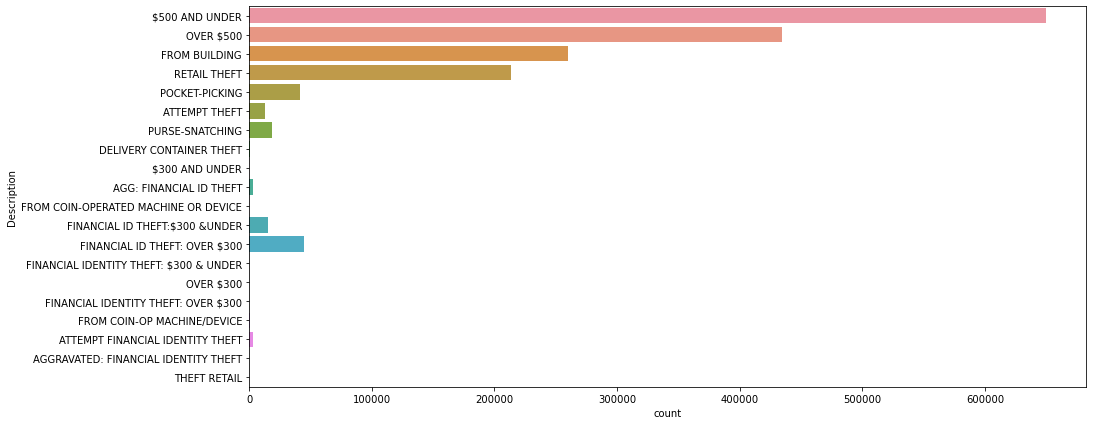

In [29]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df_theft['Description'])

In [30]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts()})

In [31]:
df_theft_data.head()

,Counts
$500 AND UNDER,650017
OVER $500,434578
FROM BUILDING,260346
RETAIL THEFT,213913
FINANCIAL ID THEFT: OVER $300,44520


In [40]:
df_theft['Description']

5          $500 AND UNDER
9          $500 AND UNDER
11              OVER $500
13          FROM BUILDING
14         $500 AND UNDER
                ...      
8045167    $500 AND UNDER
8045171    $500 AND UNDER
8045173    $500 AND UNDER
8045176      RETAIL THEFT
8045188      RETAIL THEFT
Name: Description, Length: 1699543, dtype: object

# Maybe a sorted array of counts would look good

In [42]:
df_theft_data

,Counts
$500 AND UNDER,650017
OVER $500,434578
FROM BUILDING,260346
RETAIL THEFT,213913
FINANCIAL ID THEFT: OVER $300,44520
POCKET-PICKING,41269
PURSE-SNATCHING,18555
FINANCIAL ID THEFT:$300 &UNDER,15205
ATTEMPT THEFT,13021
ATTEMPT FINANCIAL IDENTITY THEFT,2955


<AxesSubplot:xlabel='Counts'>

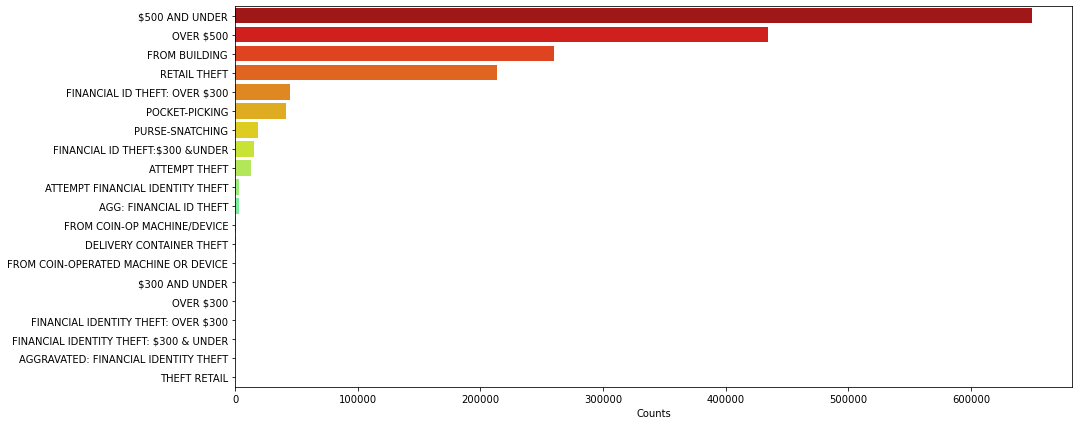

In [55]:
plt.figure(figsize = (15, 7))
sns.barplot(y =df_theft_data.index, x = "Counts", data = df_theft_data, palette="jet_r")

In [56]:
%%time
df_theft['Date'] = pd.to_datetime(df_theft['Date'])

CPU times: total: 2min 5s
Wall time: 2min 30s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)

C:\Users\potat\AppData\Local\Temp\ipykernel_24896\2408992188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft['Month'] = df_theft['Date'].apply(lambda x : x.month)


In [58]:
theft_in_months = pd.DataFrame({"thefts" : df_theft['Month'].value_counts(), "month" : df_theft["Month"].value_counts().index}, index = range(12))

In [59]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [60]:
theft_in_months.head()

,thefts,month
8,164365.0,1
11,136035.0,2
7,164252.0,3
9,150559.0,4
5,142243.0,5


In [68]:
theft_in_months

,thefts,month
8,164365.0,1
11,136035.0,2
7,164252.0,3
9,150559.0,4
5,142243.0,5
4,132096.0,6
1,132114.0,7
0,0.0,8
3,132594.0,9
2,113083.0,10


# An overall monthly trend presented in a plate

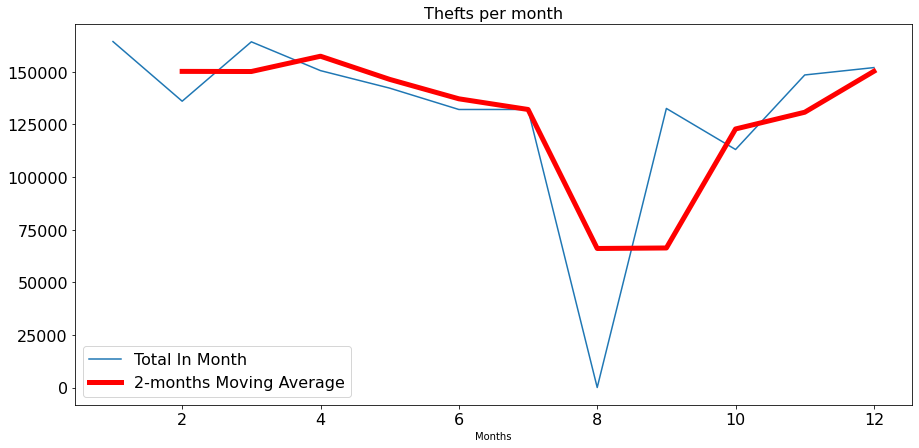

In [61]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [62]:
print(max(df_theft['Date']))
print(min(df_theft['Date']))

2024-04-16 00:00:00
2001-01-01 00:00:00


In [63]:
df_theft['Date'].iloc[0].date()

datetime.date(2002, 1, 5)

In [64]:
df_theft_dates = df_theft['Location']
df_theft_dates.index = df_theft['Date']
resampled = df_theft_dates.resample('D')
df_theft_dates['MEAN'] = resampled.size().mean()
df_theft_dates['STD'] = resampled.size().std()


C:\Users\potat\AppData\Local\Temp\ipykernel_24896\2456293969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft_dates['MEAN'] = resampled.size().mean()
C:\Users\potat\AppData\Local\Temp\ipykernel_24896\2456293969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft_dates['MEAN'] = resampled.size().mean()
C:\Users\potat\AppData\Local\Temp\ipykernel_24896\2456293969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [65]:
UCL = df_theft_dates['MEAN'] + 3 * df_theft_dates['STD']
LCL = df_theft_dates['MEAN'] -  3 * df_theft_dates['STD']

CPU times: total: 31.2 ms
Wall time: 112 ms


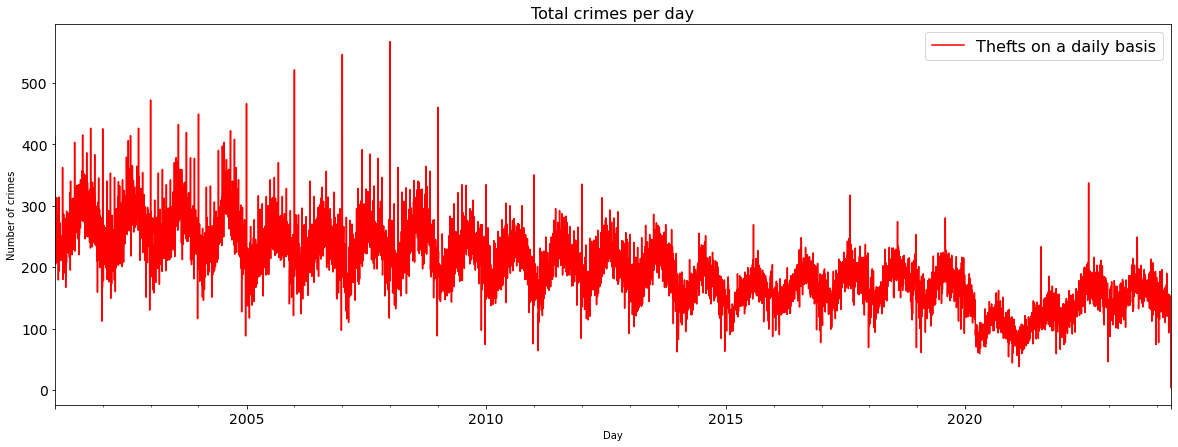

In [66]:
%%time

plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
# plt.plot(y = UCL,x = resampled.index, color='red', ls='--', linewidth=1.5, label='UCL')

# LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
# df_theft_dates['MEAN'].plot(color='red', linewidth=2, label='Average')

plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [67]:
resampled.size().std()

58.79552419135608

# As you may have noticed, the yearly crime statistics follow a general trend.

Here, the noticable trend is a rise in curve at the start of the year and achieveing the peak at the mid point. somehwhere at **June - July** . After that it has an equally sharp drop to the initial number of crimes as the year started!

# Having a look at Public Peace Violations

In [37]:
df_public_peace =  df[df['Primary Type'] == 'PUBLIC PEACE VIOLATION']

In [38]:
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts()})
df_public_data.reset_index(inplace=True)
df_public_data.head()

,index,Counts
0,RECKLESS CONDUCT,31597
1,BOMB THREAT,7154
2,ARSON THREAT,4993
3,FALSE POLICE REPORT,2652
4,OTHER VIOLATION,2165


<AxesSubplot:xlabel='Counts', ylabel='index'>

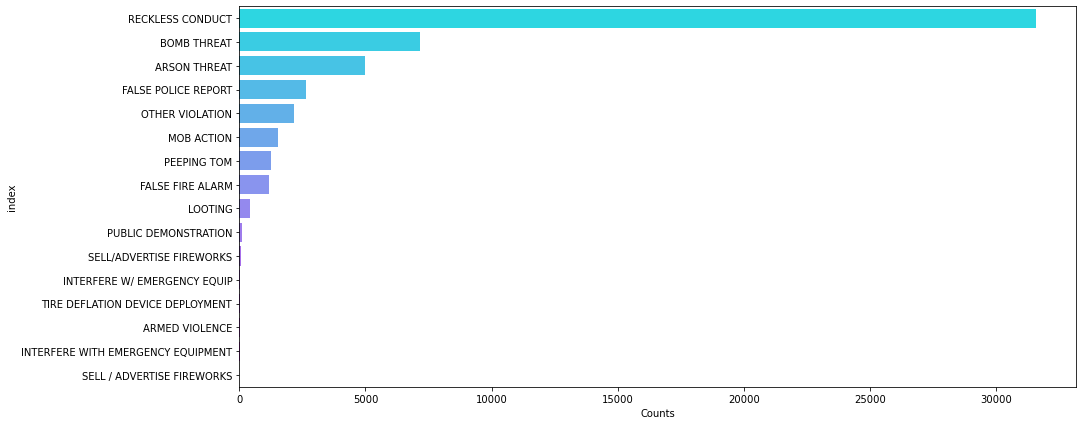

In [71]:
plt.figure(figsize = (15, 7))
sns.barplot(y ="index", x = "Counts", data = df_public_data, palette="cool")

# Focussing on Reckless Conduct, one can see how it out numbers our threats
Sadly, Bomb and Arson Threats still are a major problem in society and it's obvious to notice that most of these threats are based in Schools or Public Places.

But , can we predict where will be next Bombing threats? Let's check out that scenario.

In [72]:
unique_locations_bombs = df_public_peace['Location'].value_counts()

In [73]:
PB_index = pd.DataFrame({"Raw_String" : unique_locations_bombs.index, "ValueCount":unique_locations_bombs})
PB_index.index = range(len(unique_locations_bombs))
PB_index.head()

,Raw_String,ValueCount
0,"(41.881524451, -87.662706932)",210
1,"(41.976290414, -87.905227221)",198
2,"(41.878630716, -87.636673298)",180
3,"(41.877585867, -87.683123746)",175
4,"(41.78210152, -87.586502002)",172


In [74]:
PB_index['LocationCoord'] = PB_index['Raw_String'].apply(Location_extractor)
PB_index  = PB_index.drop(columns=['Raw_String'], axis = 1)

In [75]:
chicago_crime_pp = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)

In [76]:
for i in range(500):
    lat = PB_index['LocationCoord'].iloc[i][0]
    long = PB_index['LocationCoord'].iloc[i][1]
    radius = PB_index['ValueCount'].iloc[i] / 3

    if PB_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"

    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               PB_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_pp)

In [77]:
folium.TileLayer('cartodbpositron').add_to(chicago_crime_pp)

# These are the actual figures of pubic disruptions

In [101]:
chicago_crime_pp

## <left><font color='red'>Forecast Prediction</font></center>

As we can see in the above output, the dataframe have more than 6 million rows and 23 columns which is quite huge.

Since, the data is huge we are pretty sure that there will be some NULL values in a columns. To check the NULL values, I am using the seaborn heatmap function to visualize the NULL values.

<AxesSubplot:>

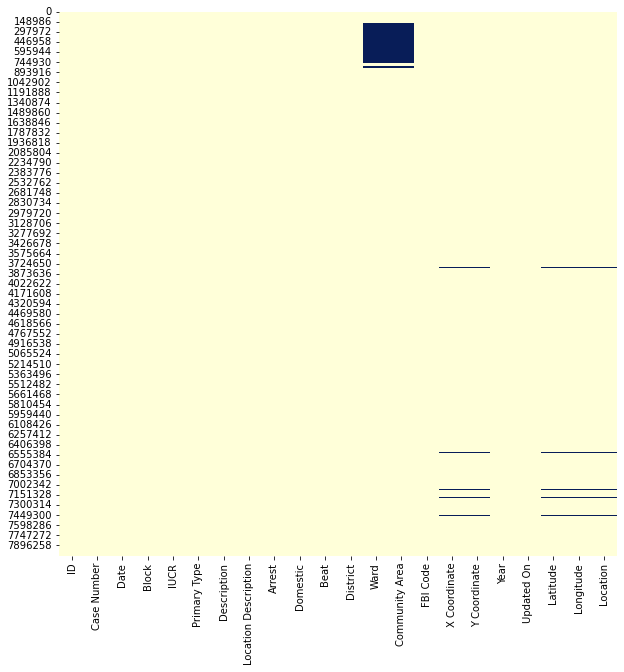

In [79]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')

The blue lines in the above figure are showing the NULL values. The NULL values are present in columns X Coordinates, Y Coordinates, Latitude, Longitude and Location.

Now, our further case study will be on only 5 columns namely Date, Block, Primary Type, Description, Location Description, Arrest and Domestic.

In [80]:
df_new = df[['Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']]
df_new.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
1,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
3,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
4,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


We have to convert Date column in to appropriate date time format for further time series analysis.

In [81]:
df_new.Date = pd.to_datetime(df_new.Date, format = '%m/%d/%Y %I:%M:%S %p')
df_new.head()

C:\Users\potat\AppData\Local\Temp\ipykernel_24896\3521001686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Date = pd.to_datetime(df_new.Date, format = '%m/%d/%Y %I:%M:%S %p')


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


## Exploratory analysis and visualization

Let's see the top 15 criminal activity happens in Chicago

In [82]:
df_new['Primary Type'].value_counts().iloc[:15]

THEFT                         1699543
BATTERY                       1467382
CRIMINAL DAMAGE                916770
NARCOTICS                      753249
ASSAULT                        529951
OTHER OFFENSE                  499728
BURGLARY                       431664
MOTOR VEHICLE THEFT            402141
DECEPTIVE PRACTICE             362733
ROBBERY                        303283
CRIMINAL TRESPASS              218930
WEAPONS VIOLATION              114775
PROSTITUTION                    70024
OFFENSE INVOLVING CHILDREN      57676
PUBLIC PEACE VIOLATION          53195
Name: Primary Type, dtype: int64

Theft is most most common criminal activity

Let's visualize the above information in a chart for an interactive view using seaborn countplot function.

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

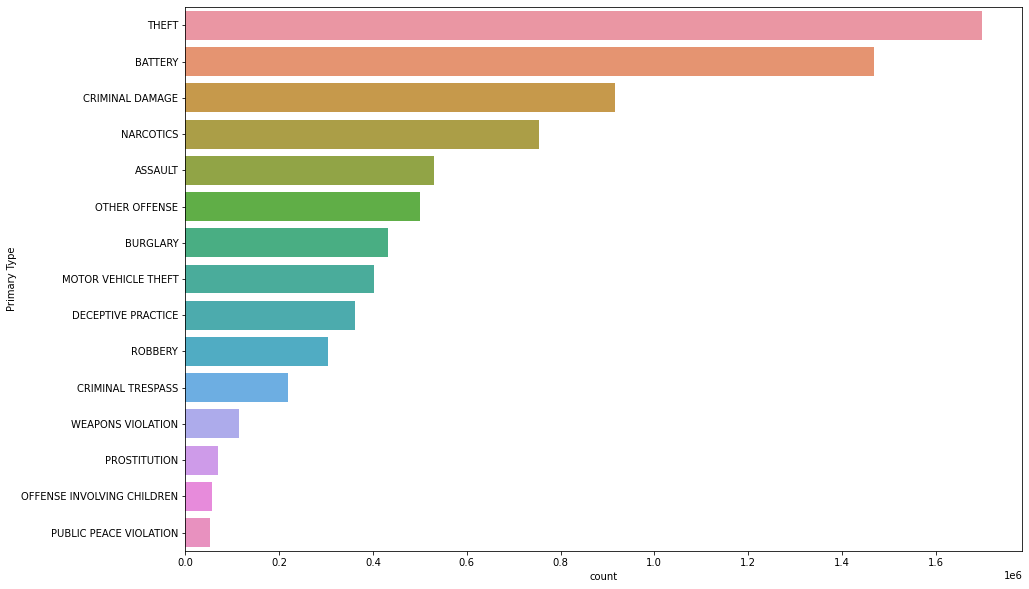

In [85]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = df_new, order = df_new['Primary Type'].value_counts().iloc[:15].index)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

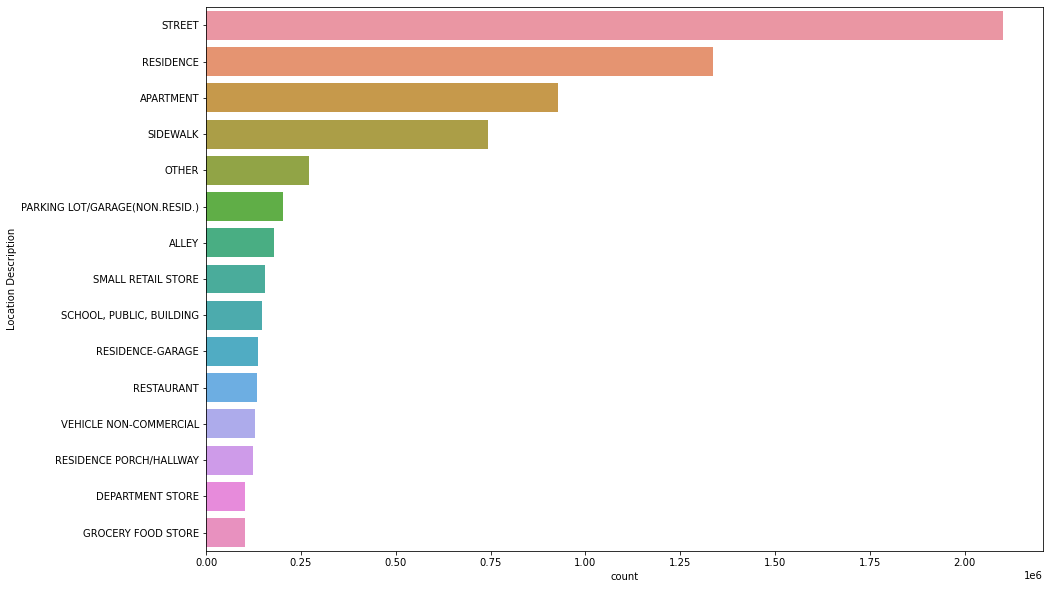

In [86]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = df_new, order = df_new['Location Description'].value_counts().iloc[:15].index)

As we can see in above chart, majority of the crimes happened in Street followed by Residence.

In [87]:
df_new.index = pd.DatetimeIndex(df_new.Date)
df_new.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2007-08-25 09:22:18,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False
2021-05-24 15:06:00,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2021-06-26 09:24:00,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False
2023-11-09 07:30:00,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False
2023-11-12 07:59:00,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False


In [89]:
df_filtered = df_new[df_new.index.year < 2024]
annual_counts = df_filtered.resample('Y').size()


In [90]:
annual_counts

Date
2001-12-31    485909
2002-12-31    486816
2003-12-31    475989
2004-12-31    469430
2005-12-31    453778
2006-12-31    448187
2007-12-31    437089
2008-12-31    427196
2009-12-31    392840
2010-12-31    370533
2011-12-31    352009
2012-12-31    336329
2013-12-31    307559
2014-12-31    275824
2015-12-31    264837
2016-12-31    269886
2017-12-31    269163
2018-12-31    268990
2019-12-31    261456
2020-12-31    212390
2021-12-31    209192
2022-12-31    239303
2023-12-31    261638
Freq: A-DEC, dtype: int64

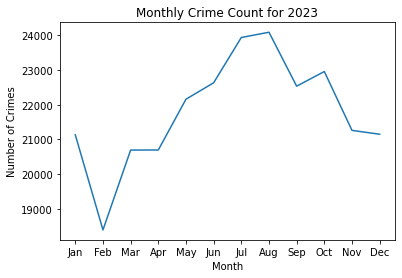

In [99]:
df_2023 = df_new[df_new.index.year == 2023]

monthly_counts_2023 = df_2023.resample('M').size()

plt.plot(monthly_counts_2023.index.month, monthly_counts_2023.values) 
plt.title('Monthly Crime Count for 2023') 
plt.xlabel('Month')  
plt.ylabel('Number of Crimes')  
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
plt.show() 

Let's count the total number of crimes happened per year

Text(0, 0.5, 'Number of crimes')

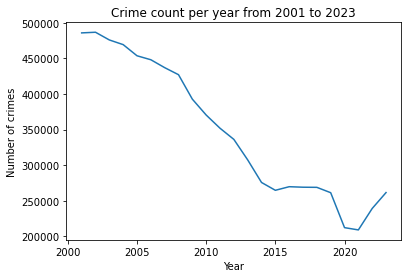

In [93]:
plt.plot(annual_counts.index.year, annual_counts.values)
plt.title('Crime count per year from 2001 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of crimes')

As we can see in above plot, the crime rate showing the decreasing trend.

You can visualize the crime rate trend per month by just replacing the 'Y' in resample function with 'm' as seen in code below.

Text(0, 0.5, 'Number of crimes')

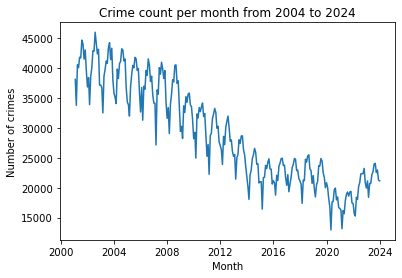

In [100]:
plt.plot(df_filtered.resample('M').size())
plt.title('Crime count per month from 2004 to 2024')
plt.xlabel('Month')
plt.ylabel('Number of crimes')

## Making predictions

In [149]:
chicago_predict = df_new.resample('M').size().reset_index()

chicago_predict.columns = ['Date', 'Crime_Count']

chicago_predict = chicago_predict.iloc[:-1]


In [150]:
chicago_predict['Date'] = pd.to_datetime(chicago_predict['Date'])
chicago_predict.set_index('Date', inplace=True)

In [151]:
from pmdarima import auto_arima
model = auto_arima(chicago_predict['Crime_Count'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
forecast, conf_int = model.predict(n_periods=24, return_conf_int=True)

future_dates = pd.date_range(start=chicago_predict.index[-1], periods=25, freq='M')[1:]  
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower_CI': conf_int[:, 0], 'Upper_CI': conf_int[:, 1]}, index=future_dates)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4887.469, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5129.535, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4949.079, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5012.790, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5127.727, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4988.634, Time=0.95 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=4922.264, Time=2.93 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=5068.753, Time=0.13 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=4968.052, Time=2.22 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4922.348, Time=2.25 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=4948.802, Time=2.81 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=4918.981, Time=1.37 sec
 ARIMA(2,1,1)(1,0,1)[12] inte

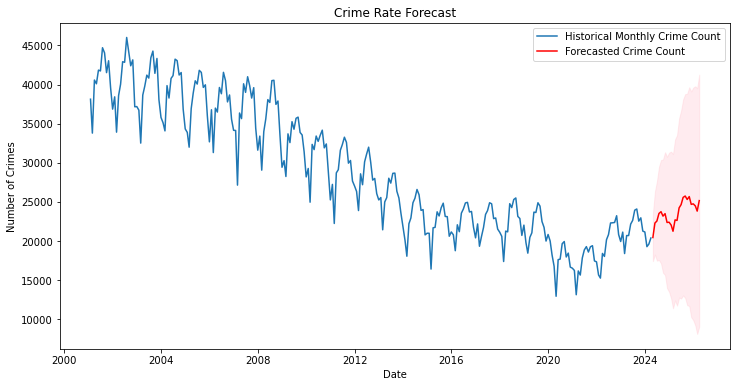

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(chicago_predict['Crime_Count'], label='Historical Monthly Crime Count')
plt.plot(forecast_df['Forecast'], color='red', label='Forecasted Crime Count')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Crime Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()
